In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [24]:
today = time.strftime("%x")
today

'04/10/22'

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aiyion
City not found. Skipping...
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | energetik
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | kirakira
Processing Record 7 of Set 1 | marsh harbour
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | banepa
Processing Record 10 of Set 1 | saint-francois
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | washougal
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | zilair
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
Processing Reco

Processing Record 35 of Set 4 | hambantota
Processing Record 36 of Set 4 | sobolevo
Processing Record 37 of Set 4 | cayenne
Processing Record 38 of Set 4 | kamaishi
Processing Record 39 of Set 4 | hailey
Processing Record 40 of Set 4 | clinton
Processing Record 41 of Set 4 | sur
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | dharmadam
Processing Record 50 of Set 4 | bairiki
Processing Record 1 of Set 5 | sibolga
Processing Record 2 of Set 5 | southbridge
Processing Record 3 of Set 5 | kayakent
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | kenai
Processing Record 7 of Set 5 | soni
Processing Record 8 of Set 5 | la cruz
Processing Record 9 of Set 5 | ankan

Processing Record 21 of Set 8 | mehamn
Processing Record 22 of Set 8 | ulladulla
Processing Record 23 of Set 8 | melipilla
Processing Record 24 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 25 of Set 8 | santa lucia
Processing Record 26 of Set 8 | esperance
Processing Record 27 of Set 8 | khatanga
Processing Record 28 of Set 8 | fukue
Processing Record 29 of Set 8 | baruun-urt
Processing Record 30 of Set 8 | ilhabela
Processing Record 31 of Set 8 | biskamzha
Processing Record 32 of Set 8 | senneterre
Processing Record 33 of Set 8 | mundo nuevo
Processing Record 34 of Set 8 | goundam
Processing Record 35 of Set 8 | aldan
Processing Record 36 of Set 8 | urucui
Processing Record 37 of Set 8 | lekoni
Processing Record 38 of Set 8 | gagarin
Processing Record 39 of Set 8 | san andres
Processing Record 40 of Set 8 | volkhov
Processing Record 41 of Set 8 | san quintin
Processing Record 42 of Set 8 | mattru
Processing Record 43 of Set 8 | cabedelo
Processing Record 44 o

Processing Record 10 of Set 12 | alquizar
Processing Record 11 of Set 12 | villa florida
Processing Record 12 of Set 12 | ostrovnoy
Processing Record 13 of Set 12 | chunskiy
Processing Record 14 of Set 12 | salinas
Processing Record 15 of Set 12 | kuopio
Processing Record 16 of Set 12 | guadalupe y calvo
Processing Record 17 of Set 12 | cap-haitien
Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | barsovo
Processing Record 20 of Set 12 | bafra
Processing Record 21 of Set 12 | kabinda
Processing Record 22 of Set 12 | prince rupert
Processing Record 23 of Set 12 | oussouye
Processing Record 24 of Set 12 | mirina
City not found. Skipping...
Processing Record 25 of Set 12 | dongsheng
Processing Record 26 of Set 12 | klaksvik
Processing Record 27 of Set 12 | kattivakkam
Processing Record 28 of Set 12 | natchitoches
Processing Record 29 of Set 12 | raudeberg
Processing Record 30 of Set 12 | paducah
Processing Record 31 of Set 12 | merauke
Processing Record 32 o

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Energetik,RU,2022-04-10 17:56:38,51.7445,58.7934,44.53,81,99,10.96
1,Vaini,TO,2022-04-10 17:56:38,-21.2000,-175.2000,77.16,88,20,8.05
2,Kirakira,SB,2022-04-10 17:56:38,-10.4544,161.9205,79.43,84,89,4.52
3,Marsh Harbour,BS,2022-04-10 17:56:39,26.5412,-77.0636,69.93,55,4,14.09
4,Ushuaia,AR,2022-04-10 17:56:39,-54.8000,-68.3000,46.06,57,75,2.30
5,Banepa,NP,2022-04-10 17:56:39,27.6298,85.5214,64.72,94,75,2.30
6,Saint-Francois,FR,2022-04-10 17:56:40,46.4154,3.9054,53.42,45,0,12.66
7,Mataura,NZ,2022-04-10 17:56:40,-46.1927,168.8643,39.87,98,18,3.31
8,Mahebourg,MU,2022-04-10 17:56:40,-20.4081,57.7000,77.29,83,75,10.36
9,Kapaa,US,2022-04-10 17:56:40,22.0752,-159.3190,75.18,88,83,7.00


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

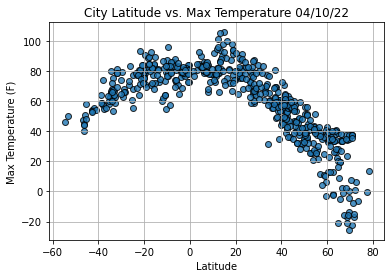

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

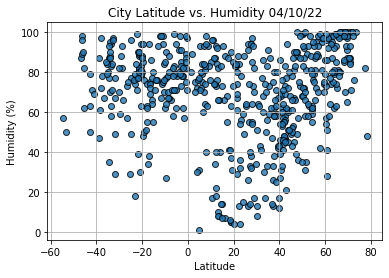

In [33]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

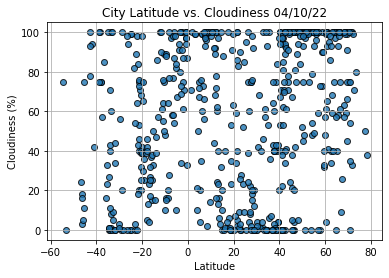

In [34]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

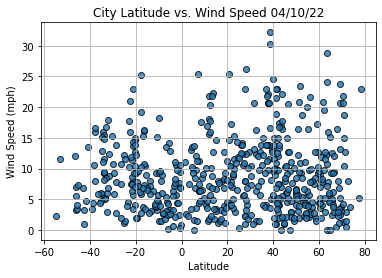

In [35]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

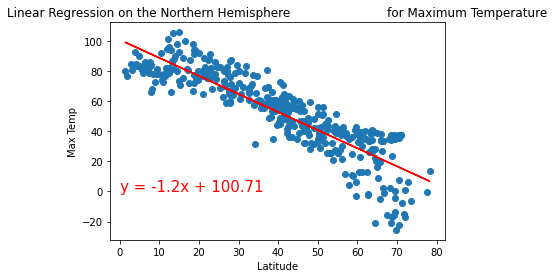

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

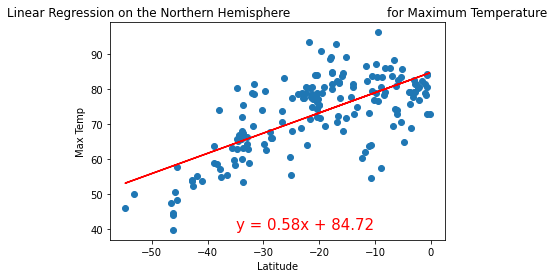

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-35,40))

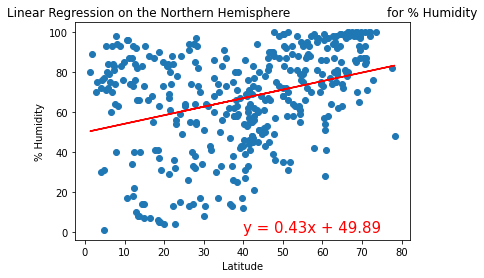

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,0))

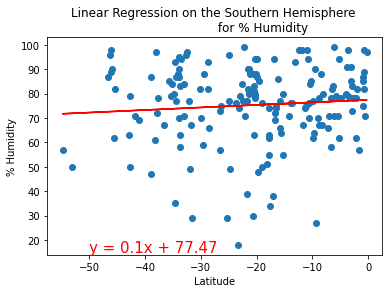

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

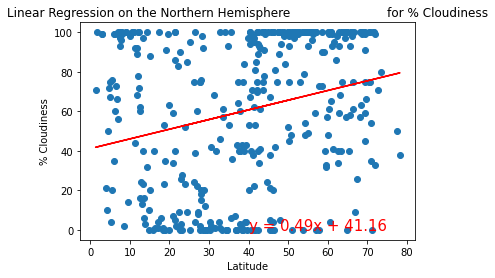

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,0))

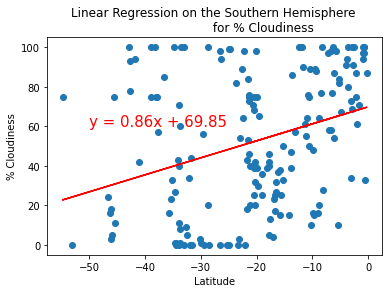

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-50,60))

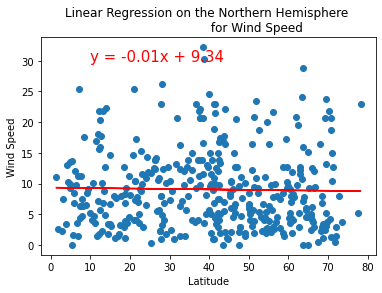

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(10,30))

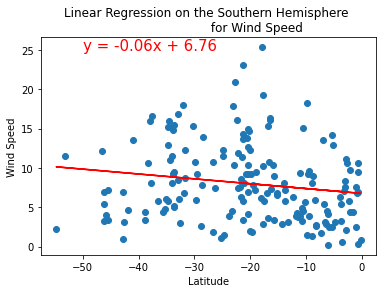

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-50,25))